In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
df_price =pd.read_csv(r"S&P 500 Historical Data.csv")

In [79]:
df_price

,Date,Price,Open,High,Low,Vol.,Change %
0,03/29/2019,"2,834.40","2,828.30","2,836.00","2,819.20",NaN,0.67%
1,03/28/2019,"2,815.40","2,809.40","2,819.70","2,798.80",NaN,0.36%
2,03/27/2019,"2,805.40","2,819.70","2,825.60","2,787.70",NaN,-0.46%
3,03/26/2019,"2,818.50","2,812.70","2,829.90","2,804.00",NaN,0.72%
4,03/25/2019,"2,798.40","2,796.00","2,809.80","2,785.00",NaN,-0.08%
...,...,...,...,...,...,...,...
1062,01/08/2015,"2,062.10","2,030.60","2,064.10","2,030.60",NaN,1.79%
1063,01/07/2015,"2,025.90","2,005.50","2,029.60","2,005.50",NaN,1.16%
1064,01/06/2015,"2,002.60","2,022.20","2,030.20","1,992.40",NaN,-0.89%
1065,01/05/2015,"2,020.60","2,054.40","2,054.40","2,017.30",NaN,-1.83%


In [80]:
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.sort_values(by='Date').reset_index(drop=True)
df_price.set_index('Date', inplace=True)
df_price['Price'] = df_price['Price'].str.replace(',', '', regex=False)
df_price['Price'] = pd.to_numeric(df_price['Price'], errors='coerce')

In [81]:
df_price['Price']

Date
2015-01-02    2058.2
2015-01-05    2020.6
2015-01-06    2002.6
2015-01-07    2025.9
2015-01-08    2062.1
               ...  
2019-03-25    2798.4
2019-03-26    2818.5
2019-03-27    2805.4
2019-03-28    2815.4
2019-03-29    2834.4
Name: Price, Length: 1067, dtype: float64

In [82]:
S0_series = df_price['Price'].dropna()

# เตรียม DataFrame เก็บผลลัพธ์
strike_dict = {}

for date, S0 in S0_series.items():
    S0_rounded = round(S0 / 25) * 25
    strikes = set()

    # Zone 1: ±5 → step = 5 → จาก [-1, 1] → [-2, 2]
    for i in range(-2, 3):  # 5 จุด
        strikes.add(S0_rounded + i * 5)

    # Zone 2: ±10 → step = 10 → [-6, 6] = 13 จุด
    for i in range(-6, 7):
        strikes.add(S0_rounded + i * 10)

    # Zone 3: ±25 → [-5, 5] = 11 จุด
    for i in range(-5, 6):
        strikes.add(S0_rounded + i * 25)

    # Zone 4: ±50 → [-5, 5] = 11 จุด
    for i in range(-5, 6):
        strikes.add(S0_rounded + i * 50)

    # Zone 5: ±100 → [-3, 3] = 7 จุด
    for i in range(-2, 3):
        strikes.add(S0_rounded + i * 100)

    strike_list = sorted(strikes)
    strike_dict[date] = strike_list

# แปลงเป็น DataFrame
df_strike = pd.DataFrame.from_dict(strike_dict, orient='index')
df_strike.columns = [f'K{i+1}' for i in range(df_strike.shape[1])]


In [83]:
df_strike

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,...,K20,K21,K22,K23,K24,K25,K26,K27,K28,K29
2015-01-02,1800,1850,1900,1925,1950,1975,1990,2000,2010,2020,...,2080,2090,2100,2110,2125,2150,2175,2200,2250,2300
2015-01-05,1775,1825,1875,1900,1925,1950,1965,1975,1985,1995,...,2055,2065,2075,2085,2100,2125,2150,2175,2225,2275
2015-01-06,1750,1800,1850,1875,1900,1925,1940,1950,1960,1970,...,2030,2040,2050,2060,2075,2100,2125,2150,2200,2250
2015-01-07,1775,1825,1875,1900,1925,1950,1965,1975,1985,1995,...,2055,2065,2075,2085,2100,2125,2150,2175,2225,2275
2015-01-08,1800,1850,1900,1925,1950,1975,1990,2000,2010,2020,...,2080,2090,2100,2110,2125,2150,2175,2200,2250,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,2550,2600,2650,2675,2700,2725,2740,2750,2760,2770,...,2830,2840,2850,2860,2875,2900,2925,2950,3000,3050
2019-03-26,2575,2625,2675,2700,2725,2750,2765,2775,2785,2795,...,2855,2865,2875,2885,2900,2925,2950,2975,3025,3075
2019-03-27,2550,2600,2650,2675,2700,2725,2740,2750,2760,2770,...,2830,2840,2850,2860,2875,2900,2925,2950,3000,3050
2019-03-28,2575,2625,2675,2700,2725,2750,2765,2775,2785,2795,...,2855,2865,2875,2885,2900,2925,2950,2975,3025,3075


In [84]:
# ตรวจให้แน่ใจว่า index ของ df_price และ df_strike ตรงกัน
common_dates = df_price.index.intersection(df_strike.index)

# ดึงราคา S ที่ตรงกับวันที่ใน df_strike
S_series = df_price.loc[common_dates, 'Price']

# เตรียม payoff DataFrame
df_payoff_call = pd.DataFrame(index=common_dates, columns=df_strike.columns)

# คำนวณ payoff: max(S - K, 0)
for date in common_dates:
    S = S_series.loc[date]
    strikes = df_strike.loc[date]
    payoffs = (S - strikes).clip(upper=0)
    df_payoff_call.loc[date] = payoffs.values


In [85]:
df_payoff_call

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,...,K20,K21,K22,K23,K24,K25,K26,K27,K28,K29
2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-21.8,-31.8,-41.8,-51.8,-66.8,-91.8,-116.8,-141.8,-191.8,-241.8
2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-34.4,-44.4,-54.4,-64.4,-79.4,-104.4,-129.4,-154.4,-204.4,-254.4
2015-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-27.4,-37.4,-47.4,-57.4,-72.4,-97.4,-122.4,-147.4,-197.4,-247.4
2015-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-29.1,-39.1,-49.1,-59.1,-74.1,-99.1,-124.1,-149.1,-199.1,-249.1
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-17.9,-27.9,-37.9,-47.9,-62.9,-87.9,-112.9,-137.9,-187.9,-237.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-31.6,-41.6,-51.6,-61.6,-76.6,-101.6,-126.6,-151.6,-201.6,-251.6
2019-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-36.5,-46.5,-56.5,-66.5,-81.5,-106.5,-131.5,-156.5,-206.5,-256.5
2019-03-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-24.6,-34.6,-44.6,-54.6,-69.6,-94.6,-119.6,-144.6,-194.6,-244.6
2019-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-39.6,-49.6,-59.6,-69.6,-84.6,-109.6,-134.6,-159.6,-209.6,-259.6


In [86]:
# คำนวณ Daily VaR 99% จากแต่ละแถว (ข้าม strike)
var_99_series = df_payoff_call.quantile(0.005, axis=1)

In [87]:
rolling_var_99 = var_99_series.rolling(window=42).mean()

In [88]:
df_var = pd.DataFrame({
    "VaR_99": var_99_series,
    "Rolling_VaR_99": rolling_var_99
})


In [89]:
df_var.tail()

,VaR_99,Rolling_VaR_99
2019-03-25,-244.6,-242.914286
2019-03-26,-249.5,-242.885714
2019-03-27,-237.6,-242.514286
2019-03-28,-252.6,-242.595238
2019-03-29,-233.6,-242.133333


In [90]:
var_99_mar2019 = var_99_series.loc["2019-03"]

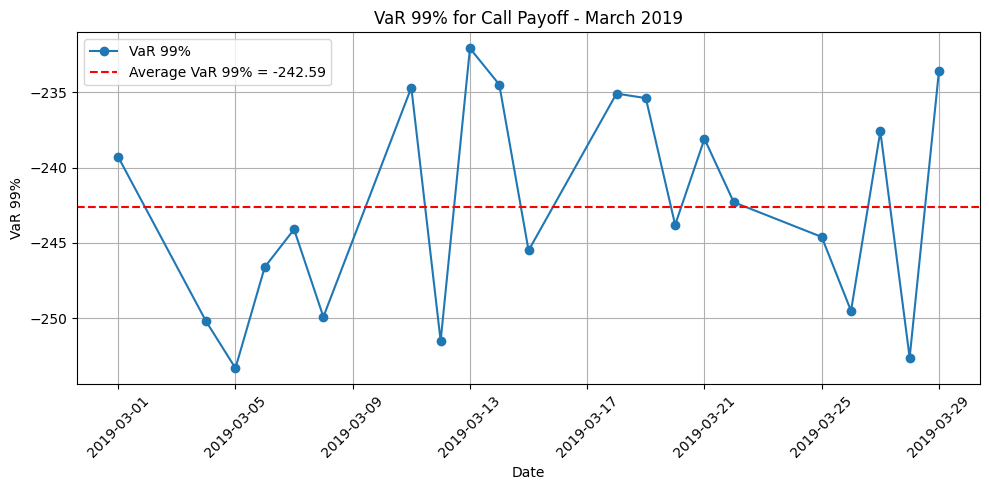

In [91]:
# คำนวณค่าเฉลี่ยของ VaR 99% ในช่วง Mar 2019
avg_var_99 = var_99_mar2019.mean()

# วาดกราฟ
plt.figure(figsize=(10, 5))
plt.plot(var_99_mar2019.index, var_99_mar2019.values, marker='o', linestyle='-', label='VaR 99%')
plt.axhline(y=avg_var_99, color='red', linestyle='--', label=f'Average VaR 99% = {avg_var_99:.2f}')

# ตกแต่งกราฟ
plt.title("VaR 99% for Call Payoff - March 2019")
plt.xlabel("Date")
plt.ylabel("VaR 99%")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [92]:
es_99_list = []

for date, row in df_payoff_call.iterrows():
    values = row.dropna().astype(float).values
    threshold = np.quantile(values, 0.01)  # VaR 99%

    tail_losses = values[values <= threshold]  # ใช้ <= เพื่อรวม VaR เองด้วย
    if len(tail_losses) > 0:
        es = tail_losses.mean()
    else:
        es = 0  # หรือ np.nan แล้วใช้ .fillna(method='ffill') ก็ได้

    es_99_list.append(es)

# สร้าง Series
es_99_series = pd.Series(es_99_list, index=df_payoff_call.index, name="ES_99")
rolling_es_99 = es_99_series.rolling(window=20).mean()


In [93]:
rolling_es_99 = es_99_series.rolling(window=20).mean()

In [94]:
df_risk_metrics = pd.DataFrame({
    "VaR_99": var_99_series,
    "ES_99": es_99_series,
    "Rolling_ES_99": rolling_es_99
})


In [95]:
df_risk_metrics

,VaR_99,ES_99,Rolling_ES_99
2015-01-02,-234.8,-241.8,NaN
2015-01-05,-247.4,-254.4,NaN
2015-01-06,-240.4,-247.4,NaN
2015-01-07,-242.1,-249.1,NaN
2015-01-08,-230.9,-237.9,NaN
...,...,...,...
2019-03-25,-244.6,-251.6,-249.710
2019-03-26,-249.5,-256.5,-249.730
2019-03-27,-237.6,-244.6,-249.080
2019-03-28,-252.6,-259.6,-250.035


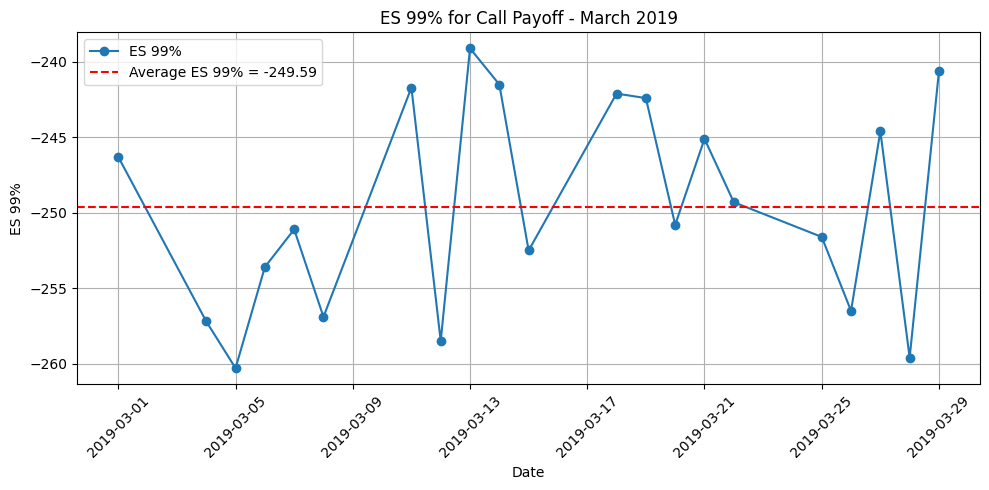

In [96]:
# 🔎 Slice เฉพาะช่วง Mar 2019
es_99_mar2019 = es_99_series.loc["2019-03"]

# ✅ คำนวณค่าเฉลี่ยของ ES 99% ในช่วงนั้น
avg_es_99 = es_99_mar2019.mean()

# 📈 วาดกราฟ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(es_99_mar2019.index, es_99_mar2019.values, marker='o', linestyle='-', label='ES 99%')
plt.axhline(y=avg_es_99, color='red', linestyle='--', label=f'Average ES 99% = {avg_es_99:.2f}')

# 🎨 ตกแต่งกราฟ
plt.title("ES 99% for Call Payoff - March 2019")
plt.xlabel("Date")
plt.ylabel("ES 99%")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [97]:
def safe_var_99_nonzero(row):
    values = row[row != 0].dropna().values
    if len(values) == 0:
        return np.nan  # กัน error ถ้าไม่มีค่า > 0
    return np.quantile(values, 0.005)

var_99_nonzero_series = df_payoff_call.apply(safe_var_99_nonzero, axis=1)


In [98]:
rolling_var_99_nonzero = var_99_nonzero_series.rolling(window=42).mean()

In [99]:
df_var_filtered = pd.DataFrame({
    "VaR_99_IncludeZero": var_99_series,                # อันที่โด้เคยใช้
    "VaR_99_ExcludeZero": var_99_nonzero_series,        # อันใหม่ (ไม่รวม 0)
    "Rolling_VaR_ExcludeZero": rolling_var_99_nonzero
})


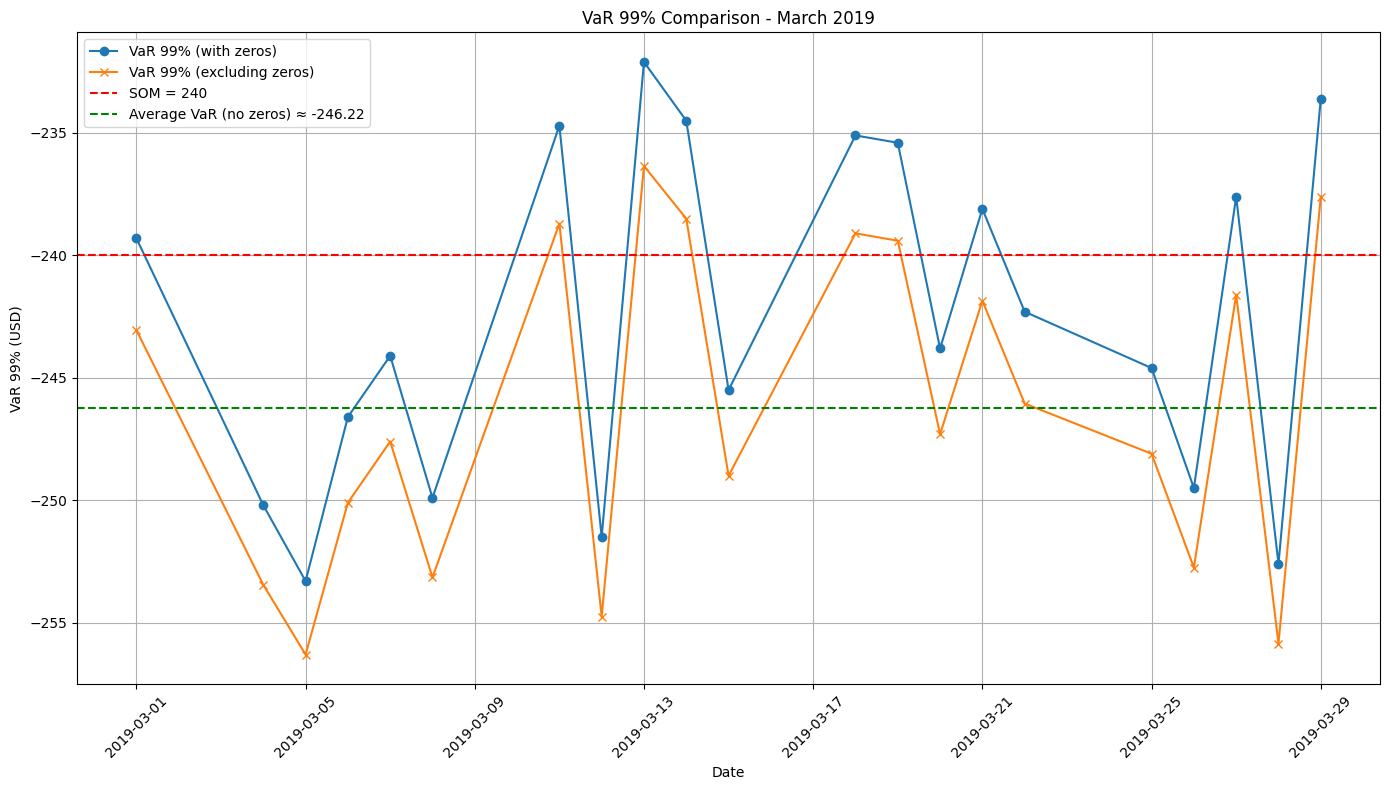

In [100]:
df_mar = df_var_filtered.loc["2019-03"]

# Calculate average of VaR_99_ExcludeZero for March
avg_var_99_exclude_zero = df_mar["VaR_99_ExcludeZero"].mean()

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df_mar.index, df_mar["VaR_99_IncludeZero"], marker='o', label="VaR 99% (with zeros)")
plt.plot(df_mar.index, df_mar["VaR_99_ExcludeZero"], marker='x', label="VaR 99% (excluding zeros)")
plt.axhline(y=-240, color='red', linestyle='--', label="SOM = 240")
plt.axhline(y=avg_var_99_exclude_zero, color='green', linestyle='--',
            label=f"Average VaR (no zeros) ≈ {avg_var_99_exclude_zero:.2f}")

# Decorate
plt.title("VaR 99% Comparison - March 2019")
plt.xlabel("Date")
plt.ylabel("VaR 99% (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()